In [110]:
#Computational and Visualisation packages
library (qdap)
library (tm)
library (RWeka)
library (wordcloud)
# Suppress warnings
options(warn=-1)

In [111]:
# Loading the HR datasets from Google and Amazon
amazon_hr <- read.csv ("../data/amazon_hr.csv")
google_hr <- read.csv ("../data/google_hr.csv")

print ("Printing Structure of Amazon dataset")
print (str(amazon_hr))
cat ("\n")
print ("Printing Structure of Google dataset")
print (str(google_hr))

[1] "Printing Structure of Amazon dataset"
'data.frame':	500 obs. of  4 variables:
 $ pg_num: int  50 50 50 50 50 50 50 50 50 50 ...
 $ url   : Factor w/ 59 levels "2","3","4","5",..: 49 49 49 49 49 49 49 49 49 49 ...
 $ pros  : Factor w/ 497 levels "#NAME?","*You get to have Amazon on your resume",..: 440 51 139 486 317 324 164 372 193 311 ...
 $ cons  : Factor w/ 496 levels "#NAME?","*Depending on your manager| might work long hours",..: 156 470 230 445 266 185 481 203 119 160 ...
NULL

[1] "Printing Structure of Google dataset"
'data.frame':	501 obs. of  4 variables:
 $ pg_num: int  1 1 1 1 1 1 1 1 1 1 ...
 $ url   : Factor w/ 50 levels "https://www.glassdoor.com/Reviews/Google-Reviews-E9079_P1.htm",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ pros  : Factor w/ 492 levels "","(1) Countless perks that probably adds 20% to your base salary (including free food| transportation| gym| dance"| __truncated__,..: 5 10 414 415 347 200 350 316 266 322 ...
 $ cons  : Factor w/ 492 levels "#ERROR!","(1) Too 

In [112]:
# Clean function based on qdap
qdap_clean <- function(x) { 
  x <- replace_abbreviation(x)
  x <- replace_contraction(x)
  x <- replace_number(x)
  x <- replace_ordinal(x)
  x <- replace_symbol(x)
  x <- tolower(x)
  return(x)
}

In [113]:
#Clean function based on tm
tm_clean <- function(corpus) {
  corpus<- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, removeWords,
                   c(stopwords("en"), "Google","google","amazon", "Amazon","company")) #choosing those words as stopwords in order to increase Accuracy and Precision

  return(corpus)
}

In [114]:
# Creating corpus and preprocessing of the pros and cons for the Amazon dataset
amzn_pros <- qdap_clean(amazon_hr$pros)
amzn_cons <- qdap_clean(amazon_hr$cons)

# Creating VCorpus()
az_p_corp <- VCorpus(VectorSource(amzn_pros))
az_c_corp <- VCorpus(VectorSource(amzn_cons))

# Preprocessing the corpus
amzn_pros_corp <- tm_clean(az_p_corp)
amzn_cons_corp <- tm_clean(az_c_corp)

In [115]:
# Creating corpus and preprocessing of the pros and cons for the Google dataset
goog_pros <- qdap_clean(google_hr$pros)
goog_cons <- qdap_clean(google_hr$cons)

# Creating VCorpus()
goog_p_corp <- VCorpus(VectorSource(goog_pros))
goog_c_corp <- VCorpus(VectorSource(goog_cons))

# Preprocessing the corpus
goog_pros_corp <- tm_clean(goog_p_corp)
goog_cons_corp <- tm_clean(goog_c_corp)

# Feature extraction and analysis for the Amazon corpus

In [116]:
#What employees speak positive about Amazon?

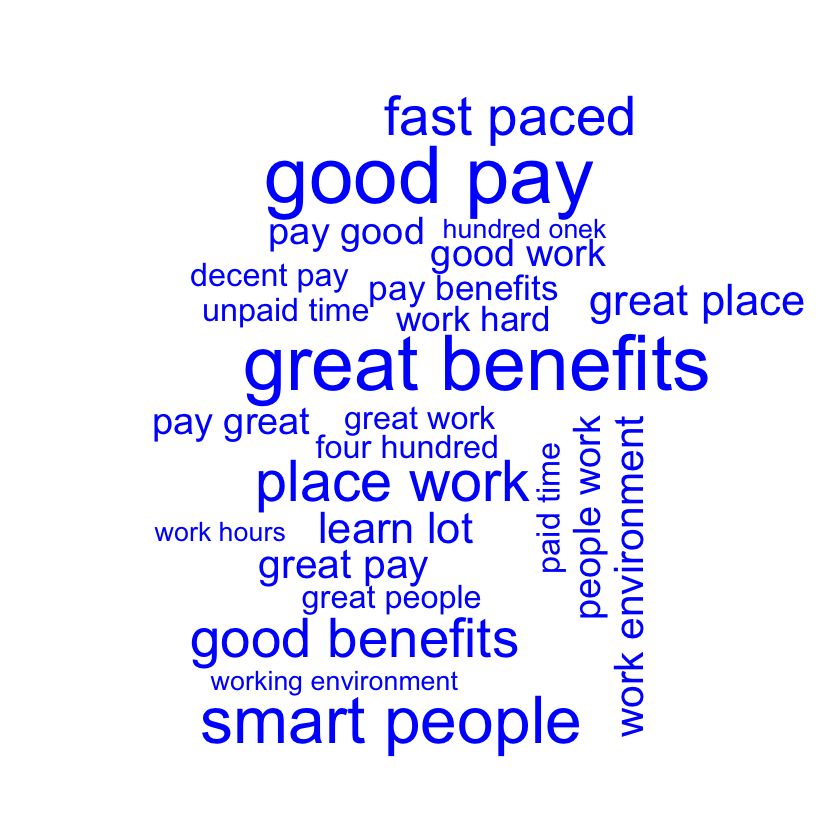

In [117]:
tokenizer <- function(x) 
  NGramTokenizer(x, Weka_control(min = 2, max = 2))

amzn_p_tdm_m <- as.matrix(TermDocumentMatrix(amzn_pros_corp, control = list(tokenize=tokenizer)))

amzn_p_freq <- rowSums(amzn_p_tdm_m) #Frequency

# Wordcloud of the frequencies
wordcloud(names(amzn_p_freq), amzn_p_freq, max.words=25, color='blue')

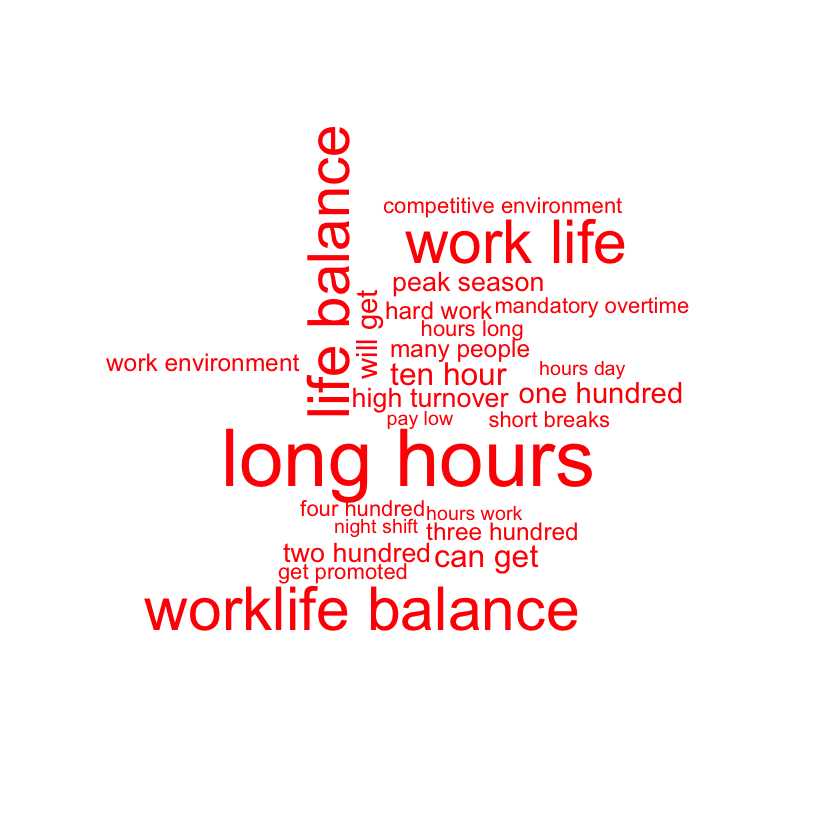

In [118]:
#What employees speak negative about Amazon?

amzn_c_tdm_m <- as.matrix(TermDocumentMatrix(amzn_cons_corp, control = list(tokenize=tokenizer)))

amzn_c_freq <- rowSums(amzn_c_tdm_m) #Frequency

# Wordcloud of the frequencies
wordcloud(names(amzn_c_freq), amzn_c_freq, max.words=25, color='red')

# Dendrogram of the Cons at Amazon

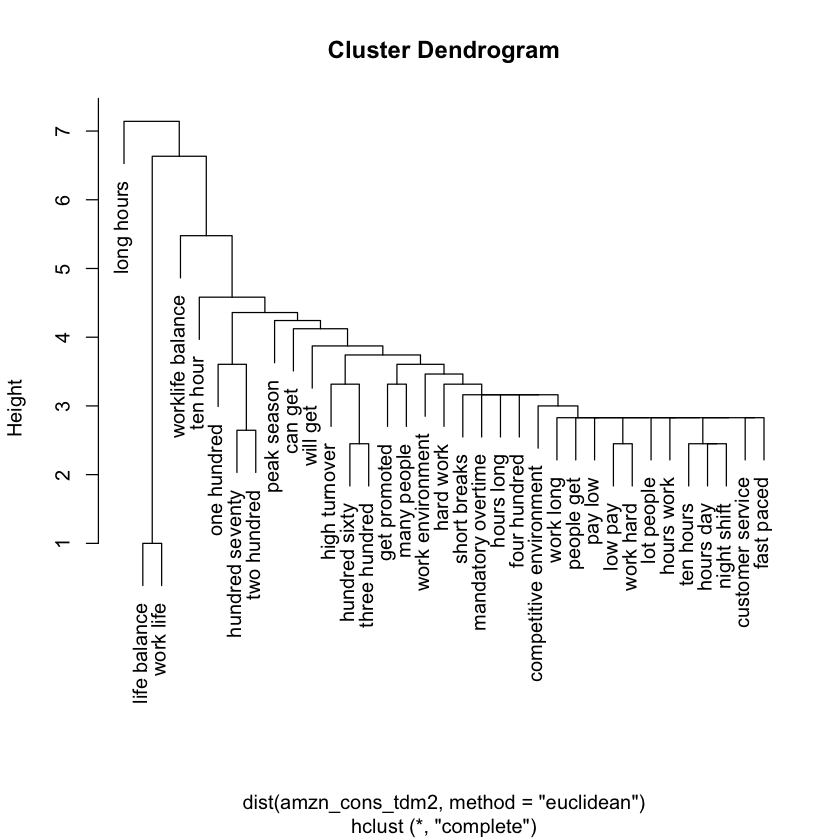

In [119]:
amzn_cons_tdm <- TermDocumentMatrix(amzn_cons_corp, control = list(tokenize = tokenizer))

# Filtering out sparse terms
amzn_cons_tdm2 <- removeSparseTerms(amzn_cons_tdm, .993)

hc <- hclust(dist(amzn_cons_tdm2, method = "euclidean"), method = "complete") #Hierarchical cluster object

# Display
plot(hc)

In [120]:
# Finding Word association from the Amazon dataset
amzn_p_tdm <- TermDocumentMatrix(amzn_pros_corp, control=list(tokenize=tokenizer))
amzn_p_m <- as.matrix(amzn_p_tdm)

# Create amzn_p_freq
amzn_p_freq <- sort(rowSums(amzn_p_m), decreasing=TRUE) #pros frequency sorted in highest occurrence to the lowest

# Printing the 5 most common terms
print (amzn_p_freq[1:5])

# Finding associations with fast paced
findAssocs(amzn_p_tdm, "fast paced", 0.2)

      good pay great benefits   smart people     place work     fast paced 
            25             24             20             17             16 


$`fast paced`
       paced environment        environments ever               learn fast 
                    0.49                     0.35                     0.35 
          paced friendly               paced work               able excel 
                    0.35                     0.35                     0.25 
          activity ample              advance one                also well 
                    0.25                     0.25                     0.25 
             amount time        ample opportunity        assistance ninety 
                    0.25                     0.25                     0.25 
          break computer            call activity               can choose 
                    0.25                     0.25                     0.25 
           catchy cheers            center things       challenging expect 
                    0.25                     0.25                     0.25 
      cheers opportunity           choose success   combined encouragement 
                    0.25                     0.25                     0.25 
competitive environments            computer room              cool things 
                    0.25                     0.25                     0.25 
         deliver results               dock makes           driven deliver 
                    0.25                     0.25                     0.25 
              easy learn        emphasis shipping encouragement innovation 
                    0.25                     0.25                     0.25 
    environment benefits       environment catchy       environment center 
                    0.25                     0.25                     0.25 
        environment fast         environment help        environment smart 
                    0.25                     0.25                     0.25 
              ever known           ever witnessed        everchanging fast 
                    0.25                     0.25                     0.25 
   everyones preferences            excel advance       excel everchanging 
                    0.25                     0.25                     0.25 
    exciting environment             expect learn        experience noting 
                    0.25                     0.25                     0.25 
          extremely fast             facility top          fail successful 
                    0.25                     0.25                     0.25 
          fantastic able               fired part             five percent 
                    0.25                     0.25                     0.25 
          freindly place      friendly atmosphere      friendly management 
                    0.25                     0.25                     0.25 
            full medical                get fired             go extremely 
                    0.25                     0.25                     0.25 
            great plenty           great teamwork     happening technology 
                    0.25                     0.25                     0.25 
         hassle benefits                 help get             help workers 
                    0.25                     0.25                     0.25 
            high quality              high volume           including full 
                    0.25                     0.25                     0.25 
       innovation owning         job requirements               leader can 
                    0.25                     0.25                     0.25 
              line break       lot responsibility         maintaining high 
                    0.25                     0.25                     0.25 
              makes time          management nice            nice facility 
                    0.25                     0.25                     0.25 
             ninety five             noting short       offers opportunity 
                    0.25                     0.25                     0.25 
         one competitive          

# Feature extraction and analysis for the Google corpus

In [121]:
#Comparison cloud of the pros and cons of working at Google

all_google_corpus <- c(goog_pros_corp, goog_cons_corp) #Merging pros and cons corpus
all_google_corpus <- tm_clean(all_google_corpus) #Preprocessing

all_google_tdm <- TermDocumentMatrix(all_google_corpus)
print (all_google_tdm)
#colnames(all_google_tdm) <- c("Google_Pros", "Google_Cons")

#Matrix and wordcloud
google_m <- as.matrix(all_google_tdm)
cat ("\n")
print (str(google_m))
#comparison.cloud(google_m, colors = c("blue", "red"), max.words = 100)

<<TermDocumentMatrix (terms: 2259, documents: 1002)>>
Non-/sparse entries: 8953/2254565
Sparsity           : 100%
Maximal term length: 27
Weighting          : term frequency (tf)

 num [1:2259, 1:1002] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ Terms: chr [1:2259] "abandon" "ability" "able" "absolute" ...
  ..$ Docs : chr [1:1002] "1" "2" "3" "4" ...
NULL
